#**1-Data Collecting:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

###**1.2- Web Scraping:**

using the web Scraping codes from Amazon.com

In [ ]:
no_pages = 15

def get_data(pageNo):
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    r = requests.get('https://www.amazon.sa/-/en/s?k=book&i=stripbooks&rh=n%3A12463048031%2Cn%3A16964834031&dc&page=3&language=en&crid=1MSN01VVU9GYY&qid=1711400365&rnid=12463048031&sprefix=engl+book%2Cstripbooks%2C312&ref=sr_pg_3'+str(pageNo)+'?ie=UTF8&pg='+str(pageNo), headers=headers)#, proxies=proxies)
    content = r.content
    soup = BeautifulSoup(content)
    #print(soup)

    alls = []
    for d in soup.findAll('div', attrs={'a-section a-spacing-small a-spacing-top-small'}):
        #print(d)
        name = d.find('span', attrs={'class':'a-size-medium a-color-base a-text-normal'})
        price = d.find('span', attrs={'class':'a-price-whole'})
        rating = d.find('span', attrs={'class':'a-icon-alt'})
        users_rated = d.find('span', attrs={'class':'a-size-base s-underline-text'})
        Author = d.find('div', attrs={'class':'a-row'})
        Format = d.find('a', attrs={'class':'a-size-base a-link-normal s-underline-text s-underline-link-text s-link-style a-text-bold'})
        OtherFormat = d.find('div', attrs={'class':'a-row a-size-base a-color-base'})

        all1=[]

        if name is not None:

            all1.append(name.text)
        else:
            all1.append("unknown-product")


        if rating is not None:
            #print(rating.text)
            all1.append(rating.text)
        else:
            all1.append('Null')

        if users_rated is not None:
            #print(price.text)
            all1.append(users_rated.text)
        else:
            all1.append('0')

        if price is not None:
            #print(price.text)
            all1.append(price.text)
        else:
            all1.append('0')
        if Author is not None:

            all1.append(Author.text)
        else:
            all1.append("None")
        if Format is not None:

            all1.append(Format.text)
        else:
            all1.append("None")
        if OtherFormat is not None:

            all1.append(OtherFormat.text)
        else:
            all1.append("None")
        alls.append(all1)
    return alls


In [ ]:
results = []
for i in range(1, no_pages+1):
    results.append(get_data(i))
flatten = lambda l: [item for sublist in l for item in sublist]
df = pd.DataFrame(flatten(results),columns=['Book Name','Rating','Reviews', 'Price', 'Author','Format', 'Other Format'])

In [ ]:
df.to_excel('/bookRdataset.xlsx')

In [ ]:
BookDS= pd.read_excel('bookRdataset.xlsx')

In [ ]:
BookDS.head(20)

,Book Name,Rating,Reviews,Price,Author,Format,Other Format
0,It Ends With Us: The emotional #1 Sunday Times...,4.7 out of 5 stars,104264,46,by Colleen Hoover,Paperback,Hardcover
1,Once Upon A Broken Heart,4.7 out of 5 stars,2545,54,by Stephanie Garber,Paperback,Hardcover
2,Atomic Habits: An Easy & Proven Way To Build G...,4.8 out of 5 stars,67367,67,by James Clear,Hardcover,Paperback
3,The 48 Laws of Power by Robert Greene - Paperback,4.7 out of 5 stars,64630,89,by Robert Greene,Paperback,Hardcover
4,The Alchemist By Paulo Coelho - Paperback,4.7 out of 5 stars,80553,33,by Paulo Coelho,Paperback,Novelty Book
5,The Great Passage,Null,0,0,2016,Prime Video,None
6,101 Essays That Will Change The Way You Think,4.6 out of 5 stars,12049,69,by Brianna Wiest,Paperback,None
7,Silver and the Book of Dreams,Null,0,0,2023,Prime Video,None
8,Thugs Of Hindostan (Telugu),Null,0,0,2018,Prime Video,None
9,12 Rules For Life: An Antidote To Chaos,4.7 out of 5 stars,52528,54,by Jordan B. Peterson,Paperback,Hardcover


#**2-Data Processing and Cleaning:**

Finding the Mising Values and Delete it **:**

In [ ]:
missing_values = BookDS.isnull().sum()
print(missing_values)

Book Name       0
Rating          0
Reviews         0
Price           0
Author          0
Format          0
Other Format    2
dtype: int64


In [ ]:
BookDS = BookDS.dropna()

Removing rows where the 'Format' column has the value 'Prime Video':

In [ ]:
specific_value = 'Prime Video'
BookDS = BookDS[BookDS['Format'] != specific_value]

Removing rows where the 'Format' column has the value 'None':

In [ ]:
specific_value = 'None'
BookDS = BookDS[BookDS['Format'] != specific_value]

Removing rows where the 'Author' column has the value 'None':

In [ ]:
specific_value = 'None'
BookDS = BookDS[BookDS['Author'] != specific_value]

Removing the " out of 5" substring from each entry in the 'Rating' column, then extracting the decimal number present in each entry And it converts the 'Rating' column to a numeric data type:

In [ ]:
BookDS['Rating'] = BookDS['Rating'].str.replace(' out of 5', '')
BookDS['Rating'] = BookDS['Rating'].str.extract(r'(\d+\.\d+)')
# Convert the column to numeric type
BookDS['Rating'] = pd.to_numeric(BookDS['Rating'])
BookDS['Price'] = pd.to_numeric(BookDS['Price'])
BookDS['Reviews'] = pd.to_numeric(BookDS['Reviews'])

Removeing the substring 'by' from the 'Author' column:

In [ ]:
BookDS['Author'] = BookDS['Author'].str.replace('by', '')

Removing the duplicates value in the 'Book Name' column:

In [ ]:
BookDS = BookDS.drop_duplicates(subset='Book Name')


Managing categorical features by using The 'select_dtypes' method to identify categorical columns in the BookDS DataFrame, then employs LabelEncoder from 'sklearn.preprocessing' to transform the 'Format' column to numerical values **:**

**Label encoding:**

**0-** Board Book   **1-**   Flexibound **2-** HardCover
**3-** Mass Market Paperback **4-** PaperBack **5**- Product Bundle **6-** Spiral-Bound

In [ ]:
categorical_features = BookDS.select_dtypes(include=['object']).columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for feature in categorical_features:
     BookDS['Format'] = label_encoder.fit_transform(BookDS['Format'])

Doing the same method for the 'Other Format Column:

**Label encoding:**

**0-** Audio CD **1-** Audio Cassette **2-** Board Book **3-** HardCover **4-** Library Binding **5-** MP3 CD **6-** Mass Market Paperback **7-** None Book

**8-** Novelty Book **9-** PaperBack

In [ ]:
categorical_features = BookDS.select_dtypes(include=['object']).columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for feature in categorical_features:
     BookDS['Other Format'] = label_encoder.fit_transform(BookDS['Other Format'])

Answering our Third question in phase 1 : Which author has the most books listed in the dataset?
we will be finding the Author who has the most books listed in the dataset by using ".mode" :

In [ ]:
most_common_value = BookDS['Author'].mode()[0]
print(most_common_value)

 CGP Books


A summary about the Numerical Variables:

In [ ]:
BookDS.describe()

,Rating,Reviews,Price,Format,Other Format
count,333.000000,338.000000,338.000000,338.000000,338.000000
mean,4.481982,8238.124260,86.248521,3.295858,5.272189
std,0.469272,16089.085569,103.906731,1.158652,2.627722
min,2.300000,0.000000,0.000000,0.000000,0.000000
25%,4.500000,575.250000,40.250000,2.000000,3.000000
50%,4.600000,2283.000000,63.000000,4.000000,6.500000
75%,4.700000,9338.250000,96.000000,4.000000,7.000000
max,4.900000,147327.000000,1301.000000,6.000000,9.000000


To answer our fifth question in phase 1: What is the average rating for books within different price ranges?
we will use this code to get the answer:

In [ ]:
# Define price ranges
price_ranges = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50,60), (60,70),(70,80),(80,90)]  # Define your own price ranges as needed

# Calculate average rating for each price range
average_ratings = []
for price_range in price_ranges:
    lower_bound, upper_bound = price_range
    filtered_books = BookDS[(BookDS['Price'] >= lower_bound) & (BookDS['Price'] < upper_bound)]
    average_rating = filtered_books['Rating'].mean()
    average_ratings.append((lower_bound, upper_bound, average_rating))

# Create a DataFrame for the results
result_df = pd.DataFrame(average_ratings, columns=['Price Lower Bound', 'Price Upper Bound', 'Average Rating'])

print(result_df)

   Price Lower Bound  Price Upper Bound  Average Rating
0                  0                 10        4.628571
1                 10                 20        4.257143
2                 20                 30        4.378261
3                 30                 40        4.405714
4                 40                 50        4.586111
5                 50                 60        4.448837
6                 60                 70        4.497222
7                 70                 80        4.434783
8                 80                 90        4.519048


In [ ]:
BookDS.to_excel('/bookStructureddataset.xlsx')

#**3-Exploratory Data Analysis (EDA):**

details about the data types:



In [ ]:
BookDS['Format'] = BookDS['Format'].astype('object')
BookDS['Other Format'] = BookDS['Other Format'].astype('object')

In [ ]:
cat_cols=BookDS.select_dtypes(include=['object']).columns
num_cols = BookDS.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Book Name', 'Author', 'Format', 'Other Format'], dtype='object')
Numerical Variables:
['Rating', 'Reviews', 'Price']


### This code iterates over each numerical column in the num_cols list, prints its name and skewness, and then plots a histogram and a boxplot to visualize the distribution and spread of values in each column:

Rating
Skew : -2.49


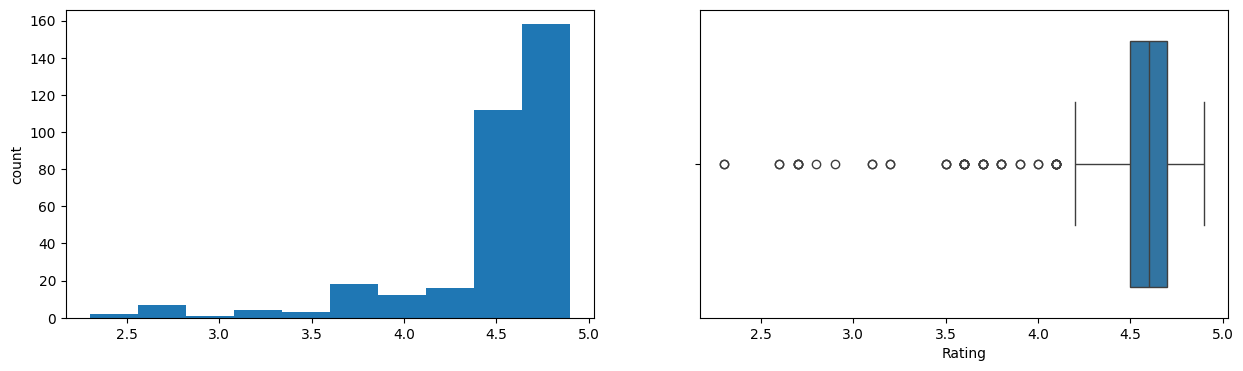

Reviews
Skew : 4.28


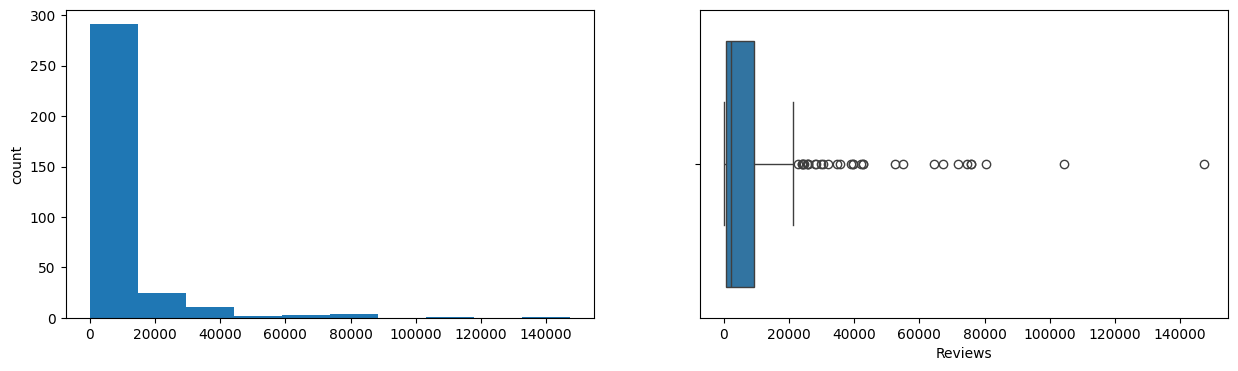

Price
Skew : 6.43


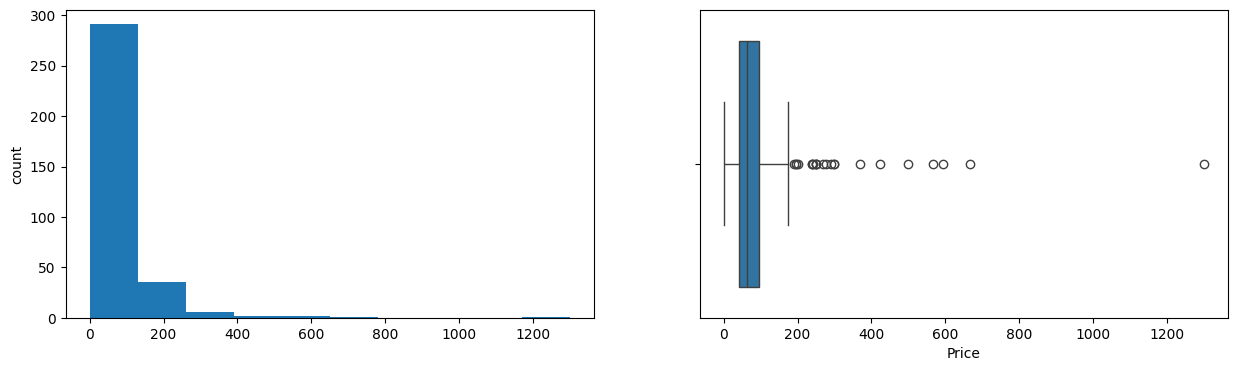

In [ ]:
for col in num_cols:
    print(col)
    print('Skew :', round(BookDS[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    BookDS[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=BookDS[col])
    plt.show()

### The heatmap visualizes the relationships between different variables in the our dataset based on their correlation coefficients:
Answering our second question in phase second : What is the correlation between the price of a book and its rating? (-0.1)

<ipython-input-17-376160636aac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(BookDS.corr(), annot=True)


<Axes: >

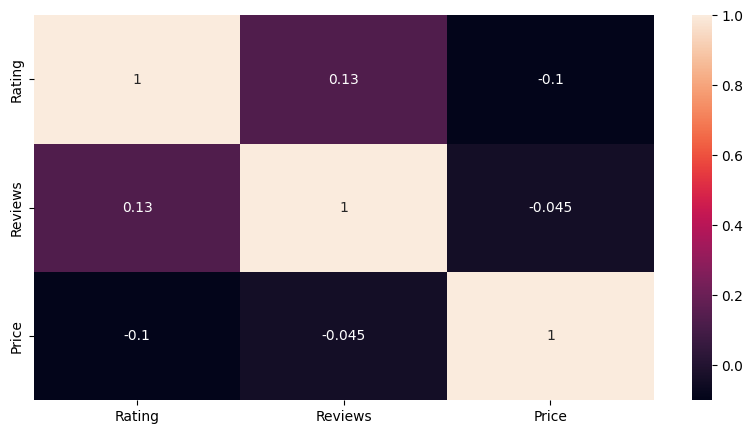

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(BookDS.corr(), annot=True)

###  the bar plot  represents a different Book Format type and the height of each bar corresponds to its 'Rating' score.
Answering our first question in phase 1 : Which book format "hardcover, paperback, Audio, etc." has the highest average rating? (paperback,hardcover,board book)

Text(0, 0.5, 'Rating Score')

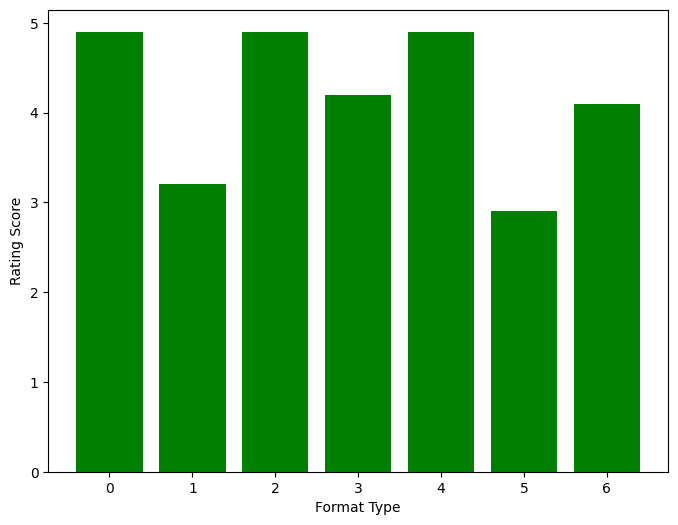

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(BookDS['Format'], BookDS['Rating'], color='Green')
plt.xlabel('Format Type')
plt.ylabel('Rating Score')

# **4-Build A model :**

With our dataset processed, cleaned, and thoroughly explored, it's time to take the next step: constructing a prediction model. By harnessing the insights gained from our EDA, we aim to develop a reliable model capable of forecasting with precision.

we want to predict the Rating using linear regression because it's a suitable choice due to its simplicity and interpretability. we will use two models (RMSE and MAE) with three algorithms (Random Forest Regression, Gradient Boosting Regression, and Baseline Model ) in the end we want to choose the best model with the right algorithm.

**4.1 Preparing the data  by separating the features and target variable**

In [30]:
#importing necessarily libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [1]:
# Prepare data
X = BookDS.drop('Rating', axis=1)  # Features
X = X.drop('Author', axis=1)  # Features
X = X.drop('Book Name', axis=1)  # Features
X = X.drop('Format', axis=1)  # Features
X = X.drop('Other Format', axis=1)  # Features
y = BookDS['Rating']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Impute missing values in training and test data
imputer = SimpleImputer(strategy='mean')  # You can change 'mean' to 'median' or 'most_frequent' if more appropriate
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


NameError: name 'BookDS' is not defined

**4.2 Splitting the dataset To training and testing sets**

In [32]:
# Models setup
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)

**4.3 Applying the models in the dataset and evalute it using RMSE and MAE**

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    return rmse, mae

# Evaluate models with imputed data
baseline_rmse, baseline_mae = evaluate_model(lin_reg, X_train_imputed, y_train, X_test_imputed, y_test)
rf_rmse, rf_mae = evaluate_model(rf_reg, X_train_imputed, y_train, X_test_imputed, y_test)
gb_rmse, gb_mae = evaluate_model(gb_reg, X_train_imputed, y_train, X_test_imputed, y_test)

# Output results
print("Baseline Model (Linear Regression) RMSE:", baseline_rmse, "MAE:", baseline_mae)
print("Random Forest RMSE:", rf_rmse, "MAE:", rf_mae)
print("Gradient Boosting RMSE:", gb_rmse, "MAE:", gb_mae)

Baseline Model (Linear Regression) RMSE: 0.3108442868213599 MAE: 0.2569384043928855
Random Forest RMSE: 0.3551152850436623 MAE: 0.27402985074626773
Gradient Boosting RMSE: 0.4092946263091741 MAE: 0.2920183319009363


## **4.4 Evaluation :**

## Linear Regression:
**RMSE** (Root Mean Squared Error): 0.310

**MAE** (Mean Absolute Error): 0.256

**Description**: Linear regression is a simple and interpretable model used for predicting continuous variables. The RMSE and MAE indicate its predictive accuracy on the given dataset. With an RMSE of 0.310 and MAE of 0.256, this model demonstrates relatively good performance in terms of both metrics. The RMSE being lower than the other models suggests that linear regression captures the variability in the data fairly well.

## Random Forest:
**RMSE**: 0.355

**MAE**: 0.274

**Description**: Random Forest is an ensemble learning method based on decision trees. It combines multiple decision trees to improve predictive performance and reduce overfitting. The RMSE of 0.355 and MAE of 0.274 indicate its performance on the dataset. While Random Forest performs well, its RMSE is slightly higher than that of linear regression, suggesting that it may not capture the variability as precisely as linear regression on this dataset.

## Gradient Boosting:
**RMSE**: 0.409

**MAE**: 0.292

**Description**: Gradient Boosting is another ensemble learning technique that builds models sequentially, with each new model correcting errors made by the previous ones. It typically provides better predictive performance than Random Forest but may be more prone to overfitting. In this case, the RMSE of 0.409 and MAE of 0.292 indicate its performance. The higher RMSE compared to both linear regression and Random Forest suggests that Gradient Boosting may not generalize as well to unseen data in this context, possibly due to overfitting.

### in the end
**Since** lower values of RMSE and MAE indicate better predictive performance, Linear Regression appears to be the better model among the three for this particular dataset. It has the lowest error metrics, suggesting that it captures the variability in the data more accurately than Random Forest and Gradient Boosting.

## **4.5 Visualizing the results**

As the Baseline model Gives the best result, we will visualize it to make it easy for having agood understanding for the result.

In [27]:
# Assuming y_test are the true values and y_pred are the predictions from one of your models
y_pred_gb = lin_reg.predict(X_test_imputed)  # Predictions from the Gradient Boosting model

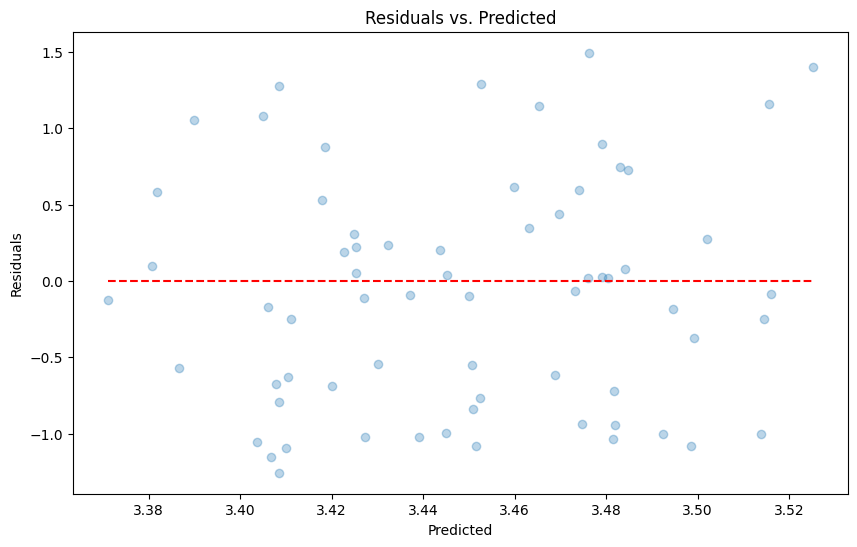

In [28]:
# Residual plot
residuals = y_test - y_pred_gb
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_gb, residuals, alpha=0.3)
plt.hlines(0, xmin=y_pred_gb.min(), xmax=y_pred_gb.max(), linestyles='dashed', colors='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.show()

A residual plot is a graphical tool used in regression analysis to assess the goodness of fit of a model by plotting the residuals against the independent variable(s). Ideally, the plot should show a random scattering of points around the horizontal axis, indicating that the model's predictions are unbiased and capturing the relationship between the variables accurately.